dataset link : https://www.kaggle.com/datasets/shivam2503/diamonds

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.drop('Unnamed: 0',axis = 1,inplace = True)
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Exploratory Data Analysis

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:

target_feature = 'price'
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O' ]
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Categorical Features:', categorical_features)

Categorical Features: ['cut', 'color', 'clarity']


In [7]:
df.dropna(inplace = True)

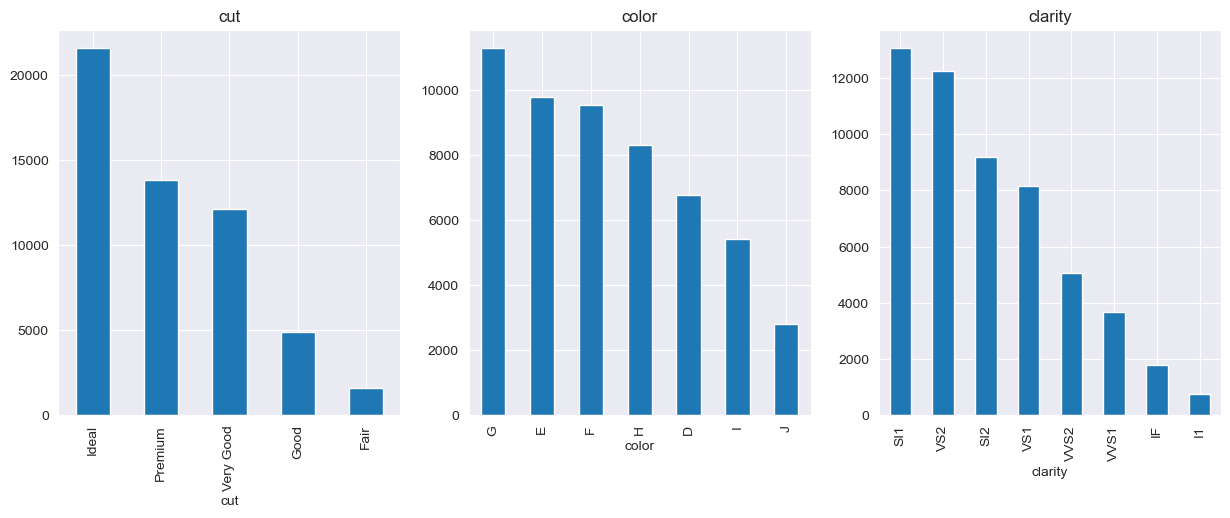

In [8]:
# plot the distribution of the Categories
plt.figure(figsize=(15,5))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i+1)
    df[feature].value_counts().plot(kind='bar')
    plt.title(feature)
plt.show()

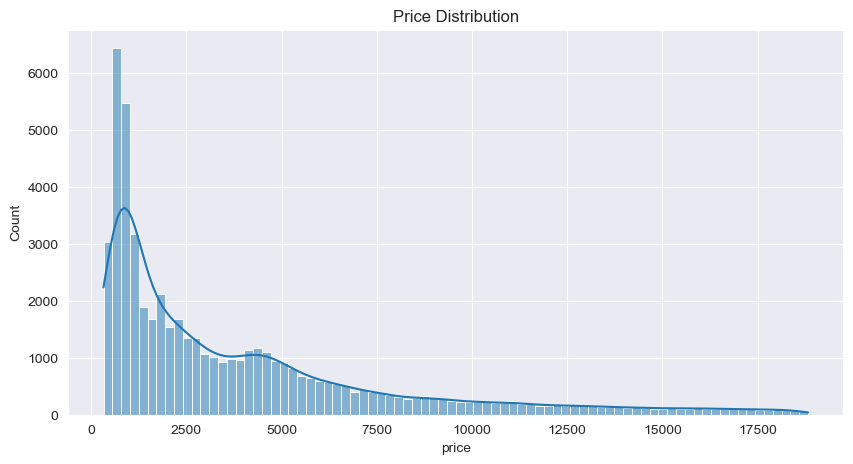

In [9]:
## target distribution

plt.figure(figsize=(10,5))
sns.histplot(df[target_feature], kde = True)
plt.title('Price Distribution')
plt.show()


In [10]:
corr = df[numerical_features].corr()[target_feature].sort_values(ascending=False)
corr


price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

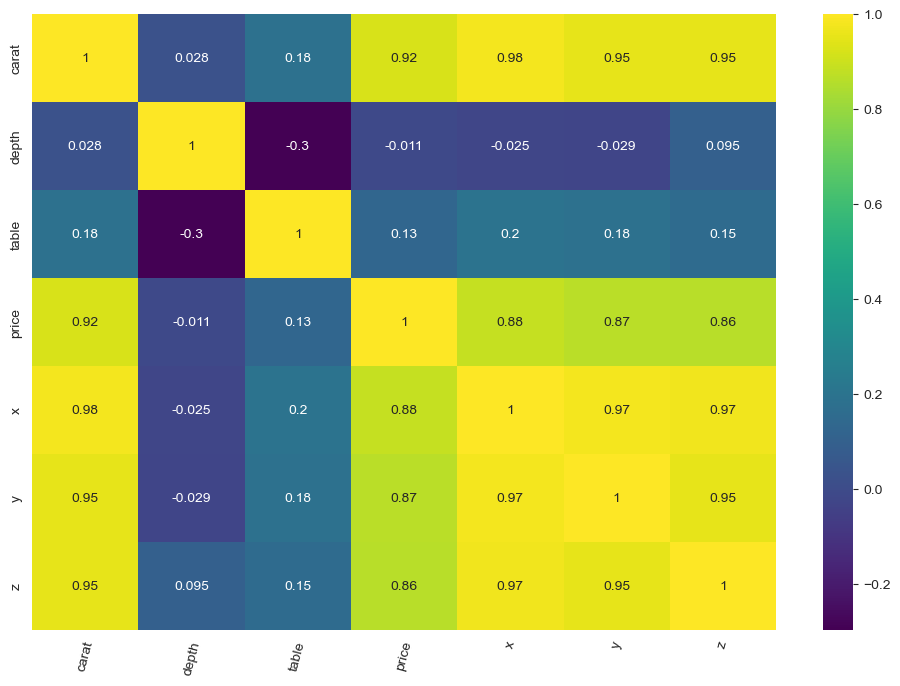

In [11]:
# Heatmap numerical features

plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='viridis')
plt.xticks(rotation=75)
plt.show()

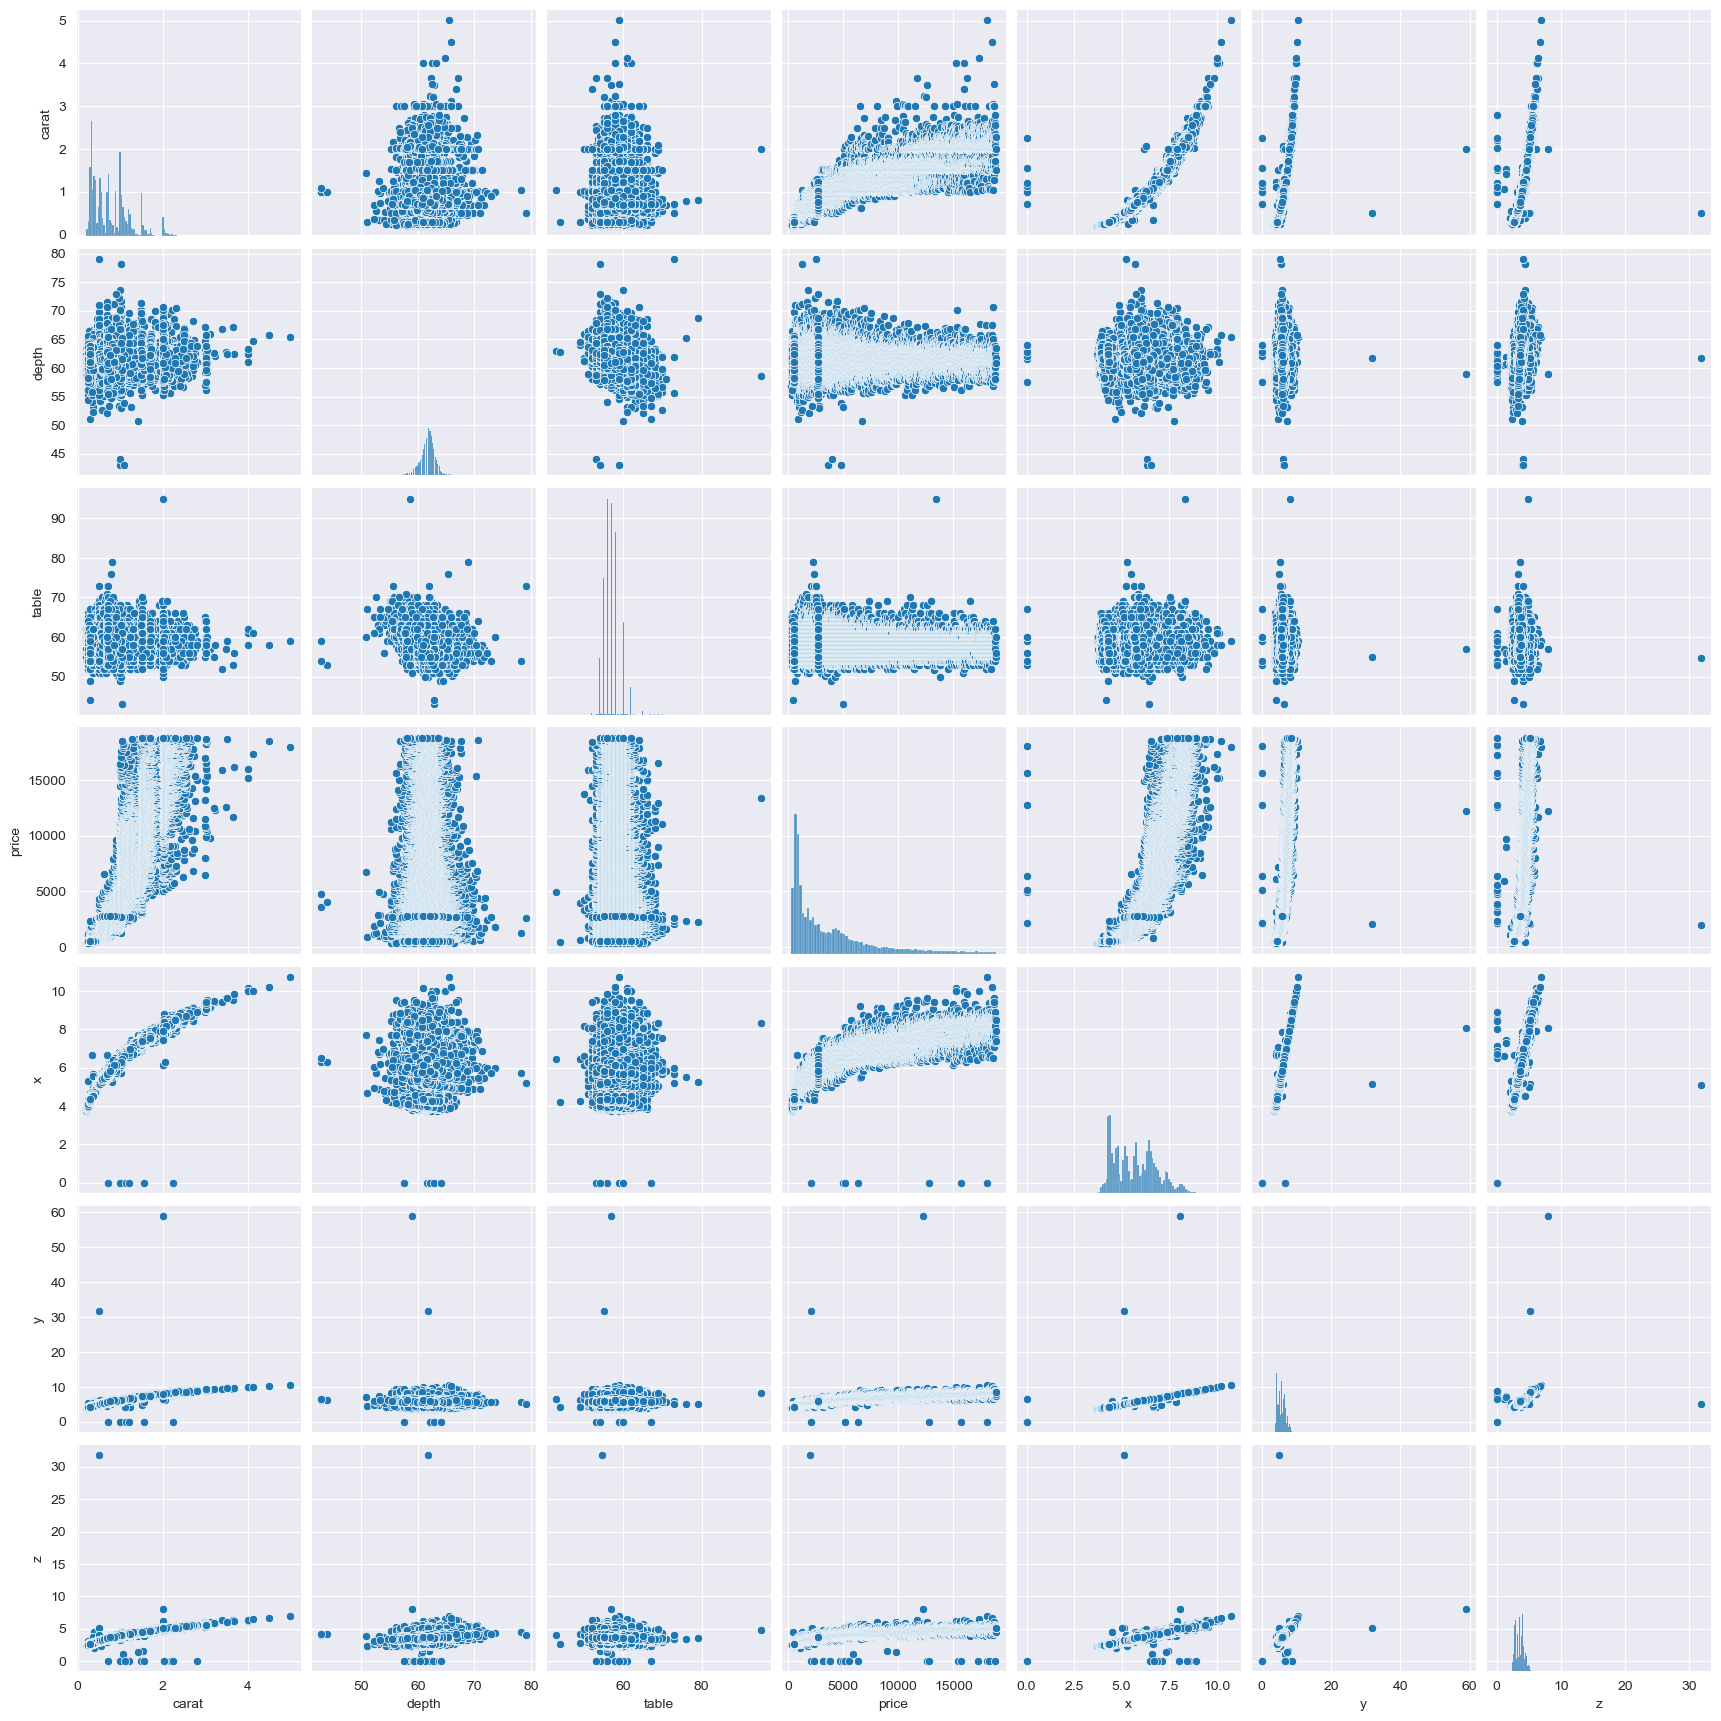

In [12]:
sns.pairplot(df)

In [13]:
## convert object cols to category
for col in df.select_dtypes(include='object'):
    df[col] = df[col].astype('category')

## Create Independent and Dependent Variables

In [14]:
X = df.drop(target_feature, axis=1)
y = df[target_feature]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Preprocessing

In [16]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for col in X_train.select_dtypes(include='category'):
    X_train[col] = label.fit_transform(X_train[col])
    X_test[col] = label.transform(X_test[col])
    

## Feature Scaling

In [17]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Grid Search

In [27]:
#import grid search
from sklearn.model_selection import GridSearchCV

def grid_search(estimator,param_grid,algorithmName):
    gridSearch = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv=3,
        n_jobs=-1, # number of jobs to run in parallel
        verbose=2,
        scoring='r2'
    )
    gridSearch.fit(X_train,y_train)
    best_params = gridSearch.best_params_
    best_score = gridSearch.best_score_
    print(algorithmName.center(50,'_'),end='\n\n')
    print(best_params)
    print(best_score)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [21]:
# Random Forest
def random_forest():
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20,],
        }
    grid_search(RandomForestRegressor(),param_grid,'Random Forest')
    
random_forest()
    

Fitting 3 folds for each of 4 candidates, totalling 12 fits
__________________Random Forest___________________

{'max_depth': 20, 'n_estimators': 200}
0.9803576792814046


In [22]:
# Decision Tree
def decision_tree():
    param_grid = {
        'max_depth': [10, 20, 30, 40],
        
    }
    grid_search(DecisionTreeRegressor(),param_grid,'Decision Tree')
    
decision_tree()


Fitting 3 folds for each of 4 candidates, totalling 12 fits
__________________Decision Tree___________________

{'max_depth': 10}
0.9721783102454382


In [23]:

# KNN

def knn():
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    grid_search(KNeighborsRegressor(),param_grid,'KNN')
    
knn()


Fitting 3 folds for each of 16 candidates, totalling 48 fits
_______________________KNN________________________

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
0.9619123340897856


In [24]:

# LGBM

def lgbm():
    param_grid = {
        'n_estimators': [20, 50],
        'learning_rate': [0.01, 0.1, 1]
    }
    grid_search(LGBMRegressor(),param_grid,'LGBM')
    
lgbm()


Fitting 3 folds for each of 6 candidates, totalling 18 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGSEGV(-11)}

In [25]:

# XGBRF

def xgbrf():
    param_grid = {
        'n_estimators': [100, 200,],
        'max_depth': [10, 20, ],
        'num_parallel_tree': [1, 2, 3]
    }
    grid_search(XGBRFRegressor(),param_grid,'XGBRF')
    
xgbrf()


Fitting 3 folds for each of 12 candidates, totalling 36 fits
______________________XGBRF_______________________

{'max_depth': 20, 'n_estimators': 200, 'num_parallel_tree': 1}
0.9791913632216183


In [28]:

# Linear Regression

def linear_regression():
    param_grid = {
        'fit_intercept': [True, False],
    }
    grid_search(LinearRegression(),param_grid,'Linear Regression')
    
linear_regression()


Fitting 3 folds for each of 2 candidates, totalling 6 fits
________________Linear Regression_________________

{'fit_intercept': True}
0.8848064072399224


## Model Tuning

In [32]:
tuned_models = {
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=20),
    'Decision Tree': DecisionTreeRegressor(max_depth=10),
    'KNN': KNeighborsRegressor(metric='manhattan', n_neighbors=7, weights='distance'),
    #'LGBM': LGBMRegressor(learning_rate=0.1, n_estimators=200),
    'XGBRF': XGBRFRegressor(max_depth=20, n_estimators=200, num_parallel_tree=1),
    'Linear Regression': LinearRegression(fit_intercept=True),
    
    
}

In [38]:


## results df
results = pd.DataFrame(columns=['Model', 'R2 Score', 'Mean Squared Error', 'Mean Absolute Error'])


for name, model in tuned_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name.center(50,'_'))
    print('R2 Score:', r2_score(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('\n')
    
    result = {
        'Model': name,
        'R2 Score': r2_score(y_test, y_pred),
        'Mean Squared Error': mean_squared_error(y_test, y_pred),
        'Mean Absolute Error': mean_absolute_error(y_test, y_pred)
    }
    result_df = pd.DataFrame([result])
    results = pd.concat([results, result_df], ignore_index=True)

__________________Random Forest___________________
R2 Score: 0.981645389518457
Mean Squared Error: 291779.96563250636
Mean Absolute Error: 267.16046978072757


__________________Decision Tree___________________
R2 Score: 0.9753125226572115
Mean Squared Error: 392452.4194003264
Mean Absolute Error: 340.4735563862971




/var/folders/w9/3z_zbj956tj44glgzg44rgbr0000gn/T/ipykernel_12634/2613624570.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_df], ignore_index=True)


_______________________KNN________________________
R2 Score: 0.9671739313542967
Mean Squared Error: 521830.15220753616
Mean Absolute Error: 356.3109020815188


______________________XGBRF_______________________
R2 Score: 0.9806828358338524
Mean Squared Error: 307081.509693918
Mean Absolute Error: 269.5722135261646


________________Linear Regression_________________
R2 Score: 0.8851397433679632
Mean Squared Error: 1825912.9915253473
Mean Absolute Error: 858.7084697710089




In [39]:
results

,Model,R2 Score,Mean Squared Error,Mean Absolute Error
0,Random Forest,0.981645,2.917800e+05,267.160470
1,Decision Tree,0.975313,3.924524e+05,340.473556
2,KNN,0.967174,5.218302e+05,356.310902
3,XGBRF,0.980683,3.070815e+05,269.572214
4,Linear Regression,0.885140,1.825913e+06,858.708470
